In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [38]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 6251 files belonging to 9 classes.


In [39]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1563 files belonging to 9 classes.


In [40]:
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.models import Sequential

In [41]:
model = Sequential()

In [42]:
cnn = tf.keras.models.Sequential()

In [43]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [44]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [45]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [46]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [47]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [48]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [49]:
cnn.add(tf.keras.layers.Flatten())

In [50]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [51]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [52]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=9,activation='softmax'))

In [53]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [55]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50
196/196 [==============================] - 32s 115ms/step - loss: 1.6080 - accuracy: 0.4364 - val_loss: 1.4231 - val_accuracy: 0.5010
Epoch 2/50
196/196 [==============================] - 17s 88ms/step - loss: 1.1535 - accuracy: 0.5847 - val_loss: 1.0596 - val_accuracy: 0.6206
Epoch 3/50
196/196 [==============================] - 17s 89ms/step - loss: 0.9244 - accuracy: 0.6745 - val_loss: 0.9871 - val_accuracy: 0.6321
Epoch 4/50
196/196 [==============================] - 17s 88ms/step - loss: 0.7470 - accuracy: 0.7408 - val_loss: 0.6207 - val_accuracy: 0.7991
Epoch 5/50
196/196 [==============================] - 18s 89ms/step - loss: 0.5708 - accuracy: 0.8061 - val_loss: 0.5718 - val_accuracy: 0.8119
Epoch 6/50
196/196 [==============================] - 18s 89ms/step - loss: 0.4709 - accuracy: 0.8434 - val_loss: 0.7354 - val_accuracy: 0.7697
Epoch 7/50
196/196 [==============================] - 17s 88ms/step - loss: 0.3338 - accuracy: 0.8938 - val_loss: 0.4454 - val_accuracy

In [56]:
#Training set ki Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

196/196 [==============================] - 6s 32ms/step - loss: 0.0174 - accuracy: 0.9949
Training accuracy: 0.9948807954788208


In [57]:
#Validation set ki Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

49/49 [==============================] - 2s 30ms/step - loss: 0.5891 - accuracy: 0.8874
Validation accuracy: 0.8873960375785828


In [74]:
cnn.save('trained_cotton_disease_model.keras')

In [59]:

training_history.history

{'loss': [1.607988953590393,
  1.15353262424469,
  0.9244112968444824,
  0.7470235228538513,
  0.570824921131134,
  0.4708598554134369,
  0.33384162187576294,
  0.2546730935573578,
  0.19579210877418518,
  0.15271113812923431,
  0.13021007180213928,
  0.094472236931324,
  0.1052606850862503,
  0.08083586394786835,
  0.07220879942178726,
  0.05298013985157013,
  0.04723290726542473,
  0.06800254434347153,
  0.05317201092839241,
  0.056807298213243484,
  0.061560746282339096,
  0.045760516077280045,
  0.04235394299030304,
  0.05000440031290054,
  0.04477492719888687,
  0.03232486546039581,
  0.034357741475105286,
  0.0413203127682209,
  0.03281201422214508,
  0.03177538141608238,
  0.07125072181224823,
  0.024638338014483452,
  0.028458021581172943,
  0.03176730126142502,
  0.039362385869026184,
  0.03427799046039581,
  0.021606601774692535,
  0.013146557845175266,
  0.030525950714945793,
  0.060689233243465424,
  0.0195448137819767,
  0.01452714204788208,
  0.017073461785912514,
  0.024

In [60]:
#History record krrha json mei 
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [61]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


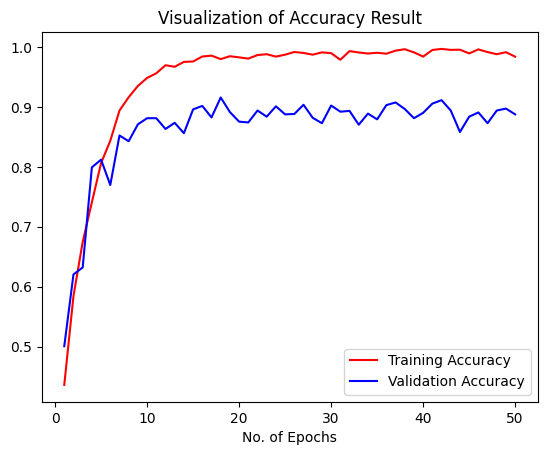

In [63]:
epochs = [i for i in range(1, len(training_history.history['accuracy']) + 1)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [64]:
class_name = validation_set.class_names

In [65]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1563 files belonging to 9 classes.


In [66]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1563/1563 [==============================] - 6s 3ms/step


In [67]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [68]:
Y_true

<tf.Tensor: shape=(1563,), dtype=int64, numpy=array([0, 0, 0, ..., 8, 8, 8], dtype=int64)>

In [69]:
predicted_categories

<tf.Tensor: shape=(1563,), dtype=int64, numpy=array([0, 0, 0, ..., 8, 3, 8], dtype=int64)>

In [70]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(Y_true,predicted_categories)

In [71]:
# Precision Recall & Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                           precision    recall  f1-score   support

                  Healthy       0.88      0.93      0.91       330
          Infected-Aphids       0.99      0.77      0.87       149
       Infected-Army worm       0.95      0.89      0.92       160
Infected-Bacterial Blight       0.83      0.88      0.85       249
 Infected-Cotton Boll Rot       0.96      0.96      0.96       192
      Infected-Curl Virus       0.85      0.96      0.90        83
  Infected-Fussarium Wilt       0.73      0.83      0.78        82
  Infected-Powdery mildew       0.90      0.96      0.93       160
     Infected-Target Spot       0.86      0.75      0.80       158

                 accuracy                           0.89      1563
                macro avg       0.88      0.88      0.88      1563
             weighted avg       0.89      0.89      0.89      1563



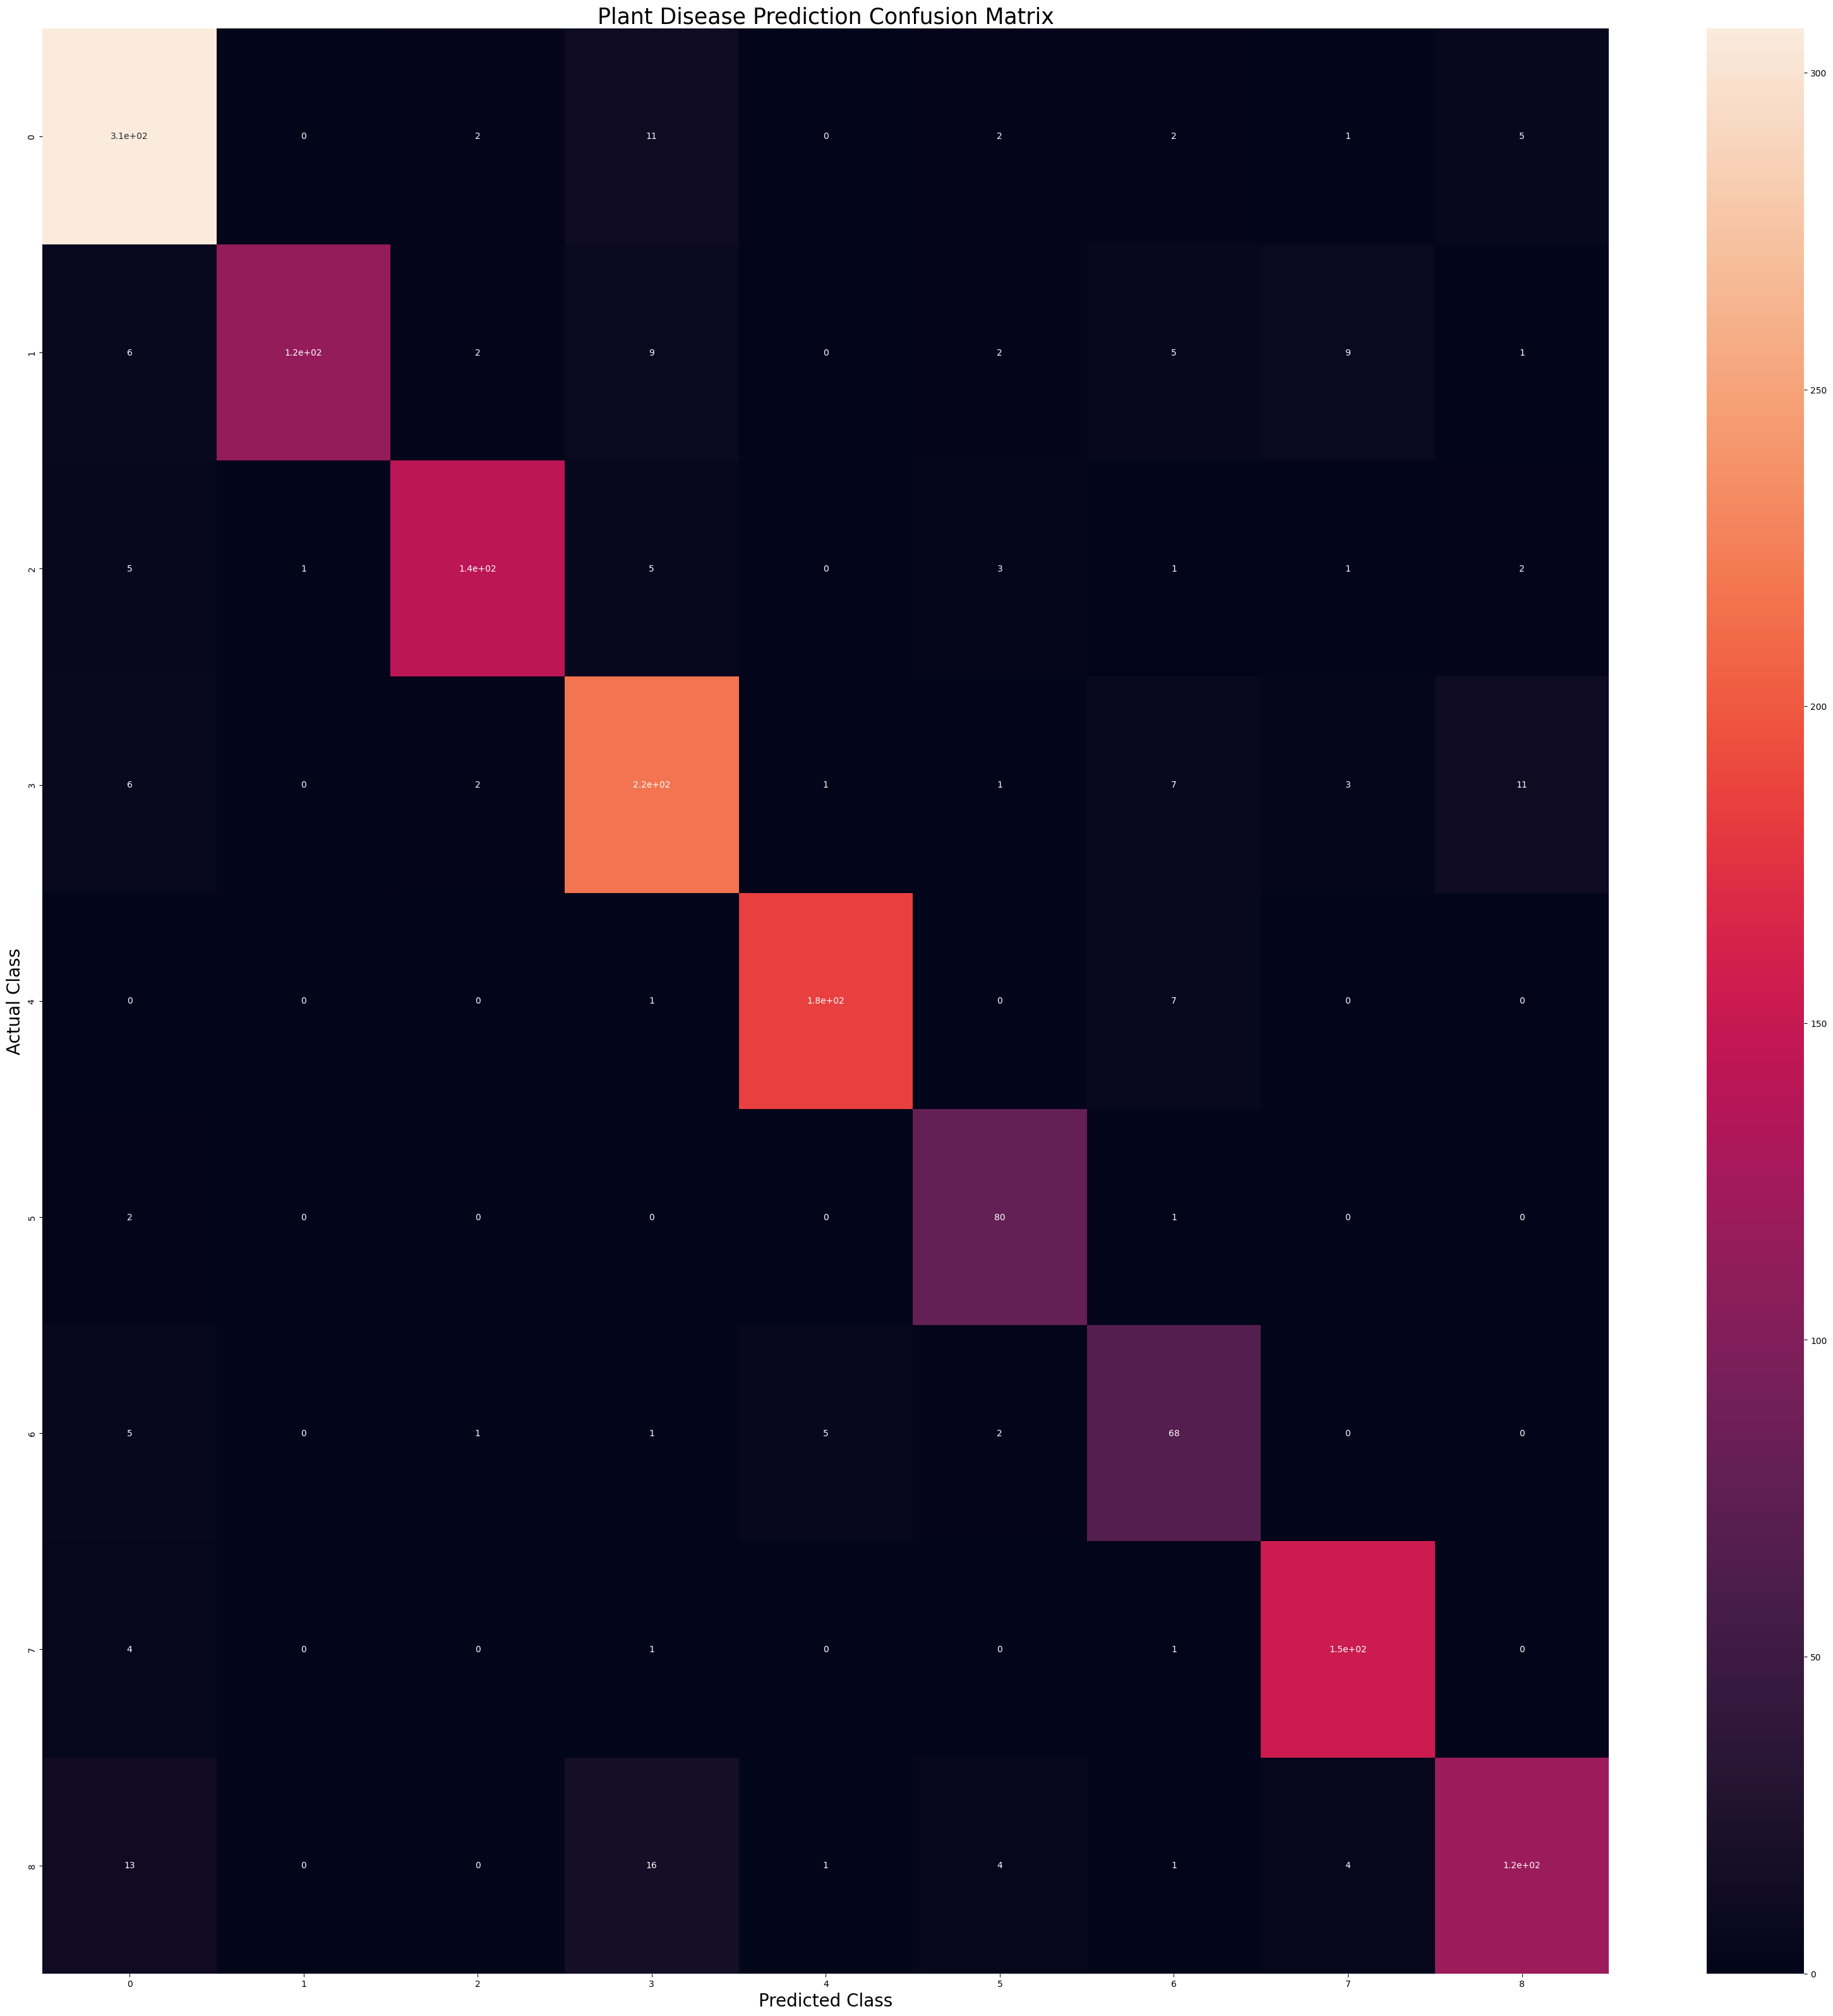

In [73]:
#confusion waali matrix
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()
